# Sonar dataset

The sonar dataset is a standard machine learning dataset for binary classification. This dataset is avaiable in:

[https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/](https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/)

There are 208 observations (examples) and involves 60 real-valued inputs (attributes). There are two classes:

- `R` for rocks
- `M` for mines

The goal is to determine whether an observation is either a rock or a mine. This notebook describes different approaches for addressing this binary classification problem:

- No Preprocessing: Using a Gaussian Process Classifier (GPC)
- Preprocessing: Transforming the attributes to make distributions more Gaussian
- Combining a GPC and preprocessed attributes


## No Preprocessing: Using a Gaussian Process Classifier (GCP)

## Preprocessing: Transforming the attributes to make distributions more Gaussian

In [ ]:
# Listing 20.1 Demonstration of the effect 

## Combining a GPC and preprocessed attributes

## ignore from here Power Transformer

In [ ]:
# Listing 20.14 Example of summarizing the sonar dataset 
# after applying a Yeo-Johnson tranform
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer





## Gaussian Process

In [8]:
%matplotlib notebook
import numpy as np
import pandas as pd

# load dataset
main_df = pd.read_csv("sonar.all-data.csv", header=None)
main_df

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.0579  0.1122   
12   0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
13   0.0090  0.0062  0.0253  0.0489  0.1197  0.1589  0.1392  0.0987  0.0955   
14   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
15   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
16   0.0352  0.0116  0.0191  0.0469  0.0737  0.1185  0.1683  0.1541  0.1466   
17   0.0192  0.0607  0.0378  0.0774  0.1388  0.0809  0.0568  0.0219  0.1037   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
19   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
20   0.0473  0.0509  0.0819  0.1252  0.1783  0.3070  0.3008  0.2362  0.3830   
21   0.0664  0.0575  0.0842  0.0372  0.0458  0.0771  0.0771  0.1130  0.2353   
22   0.0099  0.0484  0.0299  0.0297  0.0652  0.1077  0.2363  0.2385  0.0075   
23   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
24   0.0293  0.0644  0.0390  0.0173  0.0476  0.0816  0.0993  0.0315  0.0736   
25   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
26   0.0151  0.0320  0.0599  0.1050  0.1163  0.1734  0.1679  0.1119  0.0889   
27   0.0177  0.0300  0.0288  0.0394  0.0630  0.0526  0.0688  0.0633  0.0624   
28   0.0100  0.0275  0.0190  0.0371  0.0416  0.0201  0.0314  0.0651  0.1896   
29   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
178  0.0197  0.0394  0.0384  0.0076  0.0251  0.0629  0.0747  0.0578  0.1357   
179  0.0394  0.0420  0.0446  0.0551  0.0597  0.1416  0.0956  0.0802  0.1618   
180  0.0310  0.0221  0.0433  0.0191  0.0964  0.1827  0.1106  0.1702  0.2804   
181  0.0423  0.0321  0.0709  0.0108  0.1070  0.0973  0.0961  0.1323  0.2462   
182  0.0095  0.0308  0.0539  0.0411  0.0613  0.1039  0.1016  0.1394  0.2592   
183  0.0096  0.0404  0.0682  0.0688  0.0887  0.0932  0.0955  0.2140  0.2546   
184  0.0269  0.0383  0.0505  0.0707  0.1313  0.2103  0.2263  0.2524  0.3595   
185  0.0340  0.0625  0.0381  0.0257  0.0441  0.1027  0.1287  0.1850  0.2647   
186  0.0209  0.0191  0.0411  0.0321  0.0698  0.1579  0.1438  0.1402  0.3048   
187  0.0368  0.0279  0.0103  0.0566  0.0759  0.0679  0.0970  0.1473  0.2164   
188  0.0089  0.0274  0.0248  0.0237  0.0224  0.0845  0.1488  0.1224  0.1569   
189  0.0158  0.0239  0.0150  0.0494  0.0988  0.1425  0.1463  0.1219  0.1697   
190  0.0156  0.0210  0.0282  0.0596  0.0462  0.0779  0.1365  0.0780  0.1038   
191  0.0315  0.0252  0.0167  0.0479  0.0902  0.1057  0.1024  0.1209  0.1241   
192  0.0056  0.0267  0.0221  0.0561  0.0936  0.1146  0.0706  0.0996  0.1673   
193  0.0203  0.0121  0.0380  0.0128  0.0537  0.0874  0.1021  0.0852  0.1136   
194  0.0392  0.0108  0.0267  0.0257  0.0410  0.0491  0.1053  0.1690  0.2105   
195  0.0129  0.0141  0.0309  0.0375  0.0767  0.0787  0.0662  0.1108  0.1777   
196  0.0050  0.0017  0.0270  0.0450  0.0958  0.0830  0.0879

1. There are 208 observations with 61 columns.

In [ ]:
main_df.values.shape

The last column contains the targets. Let's check the balance among clases, (R) rock and (M) mine:

In [18]:
main_df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

<IPython.core.display.Javascript object>


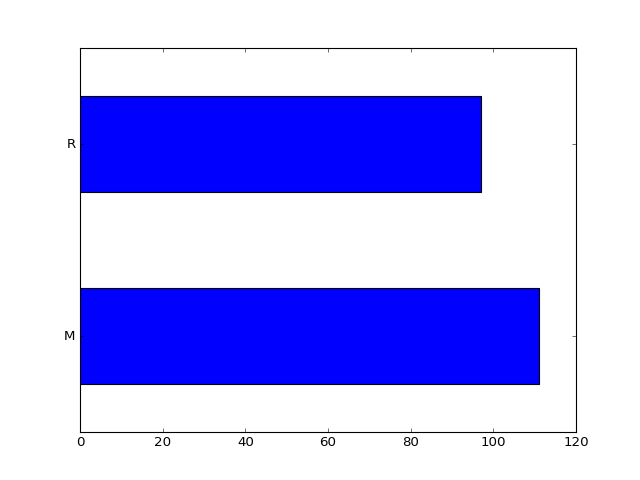

In [22]:
main_df[60].value_counts().plot(kind="barh");

In [35]:
# split inputs and targets
inputs_df = main_df.drop(60, axis=1)
target_df = pd.get_dummies(main_df[60])
rock_y_df = target_df["R"]   # is_rock? 0: No, 1: Yes
mine_y_df = target_df["M"]   # is_mine? 0: No, 1: Yes

In [25]:
inputs_df.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      50      51      52      53      54      55      56  \
0  0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1  0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2  0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
3  0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
4  0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   

       57      58      59  
0  0.0084  0.0090  0.0032  
1  0.0049  0.0052  0.0044  
2  0.0164  0.0095  0.0078  
3  0.0044  0.0040  0.0117  
4  0.0048  0.0107  0.0094  

[5 rows x 60 columns]

In [26]:
target_df.head()

M  R
0  0  1
1  0  1
2  0  1
3  0  1
4  0  1

In [34]:
rock_y_df.value_counts()

0    111
1     97
Name: R, dtype: int64

In [36]:
# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs_df, mine_y_df, test_size=0.30, random_state=42)

In [37]:
# use polynomial features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

poly = PolynomialFeatures(2)

gpc = GaussianProcessClassifier(1.0 * RBF(1.0))
clf = Pipeline([("POLY", poly),
                ("GP", gpc)])

# train model
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('POLY',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('GP',
                 GaussianProcessClassifier(copy_X_train=True,
                                           kernel=1**2 * RBF(length_scale=1),
                                           max_iter_predict=100,
                                           multi_class='one_vs_rest',
                                           n_jobs=None, n_restarts_optimizer=0,
                                           optimizer='fmin_l_bfgs_b',
                                           random_state=None,
                                           warm_start=False))],
         verbose=False)

In [38]:
clf.score(X_train, y_train)

1.0

In [39]:
clf.score(X_test, y_test)

0.9206349206349206

This is our baseline.

## Preprocessing

<IPython.core.display.Javascript object>


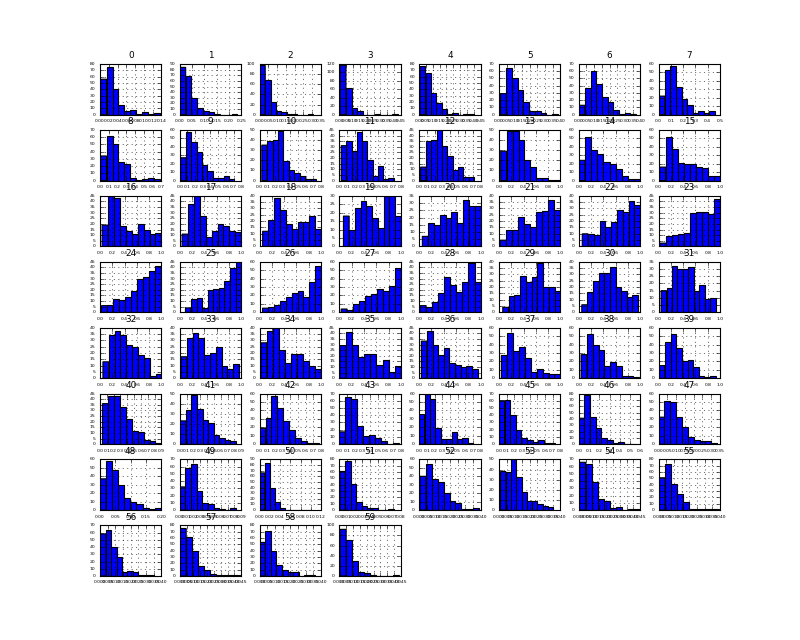

In [45]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig = main_df.hist(xlabelsize=4, ylabelsize=4, figsize=(10, 8))
[x.title.set_size(8) for x in fig.ravel()];

In [49]:
# box-cox transform
from sklearn.preprocessing import PowerTransformer

# get the numeric input values
data = inputs_df.values

# perform a box-cox transform on the dataset
pt = PowerTransformer(method="box-cox")

# this will raise an error:
# ValueError: The Box-Cox transformation can only be applied to strictly positive data
data = pt.fit_transform(data)

ValueError: The Box-Cox transformation can only be applied to strictly positive data

<IPython.core.display.Javascript object>


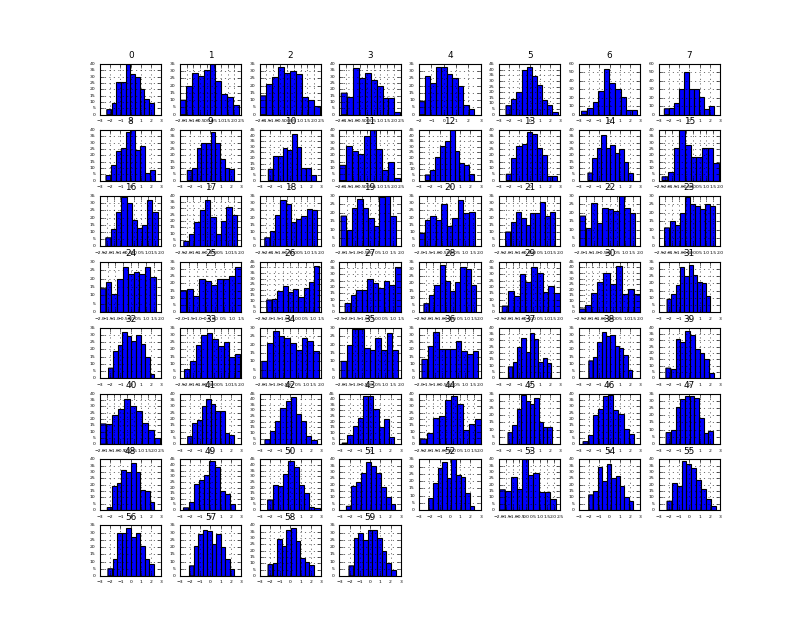

In [52]:
# box-cox transform
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

# get the numeric input values
data = inputs_df.values

# normalization
scaler = MinMaxScaler(feature_range=(1, 2))

# perform a box-cox transform on the dataset
power = PowerTransformer(method="box-cox")

# create a preprocessing pipeline
pipeline = Pipeline([("scaler", scaler),
                     ("box-cox", power)
                ])

# preprocess data
data = pipeline.fit_transform(data)

# convert data back to dataframe
data_df = pd.DataFrame(data)

# histogram
fig = data_df.hist(xlabelsize=4, ylabelsize=4, figsize=(10, 8))
[x.title.set_size(8) for x in fig.ravel()];

<IPython.core.display.Javascript object>


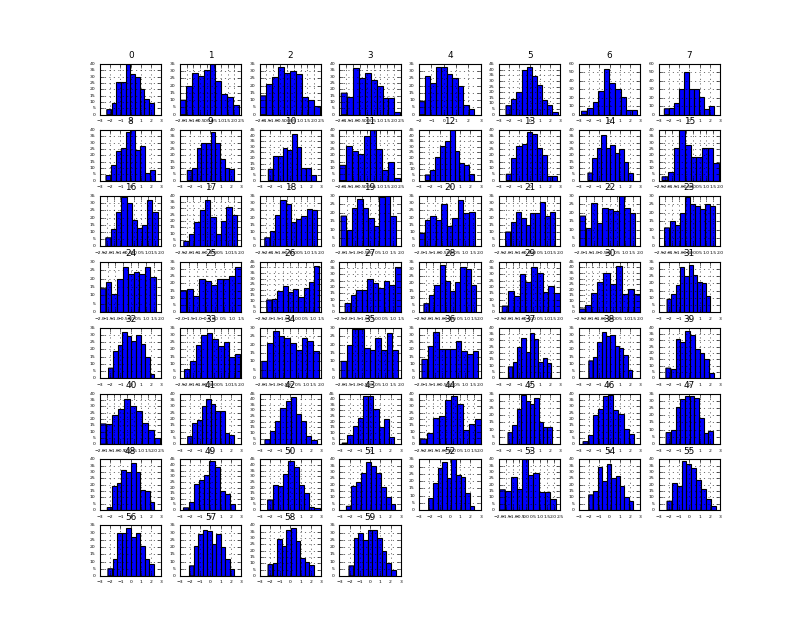

In [71]:
# box-cox transform
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

# get the numeric input values
data = inputs_df.values

# normalization
scaler = MinMaxScaler()

# perform a box-cox transform on the dataset
power = PowerTransformer(method="yeo-johnson")

# create a preprocessing pipeline
pipeline = Pipeline([("scaler", scaler),
                     ("box-cox", power)
                ])

# preprocess data
data = pipeline.fit_transform(data)

# convert data back to dataframe
data_df = pd.DataFrame(data)

# histogram
fig = data_df.hist(xlabelsize=4, ylabelsize=4, figsize=(10, 8))
[x.title.set_size(8) for x in fig.ravel()];

In [80]:
# Let's evaluate the classifier again

# classifier
poly = PolynomialFeatures(2)
gpc = GaussianProcessClassifier(1.0 * RBF(1.0))
clf = Pipeline([("POLY", poly),
                ("GP", gpc)])

# get numeric values
data = inputs_df.values

# preprocessing
scaler = MinMaxScaler()
power = PowerTransformer(method="yeo-johnson")
pipeline = Pipeline([("scaler", scaler),
                     ("box-cox", power)])
data = pipeline.fit_transform(data)

# convert data back to dataframe
preproc_inputs_df = pd.DataFrame(data)

# split
X_train, X_test, y_train, y_test = train_test_split(preproc_inputs_df, mine_y_df, test_size=0.30, random_state=42)

# train model
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('POLY',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('GP',
                 GaussianProcessClassifier(copy_X_train=True,
                                           kernel=1**2 * RBF(length_scale=1),
                                           max_iter_predict=100,
                                           multi_class='one_vs_rest',
                                           n_jobs=None, n_restarts_optimizer=0,
                                           optimizer='fmin_l_bfgs_b',
                                           random_state=None,
                                           warm_start=False))],
         verbose=False)

In [81]:
clf.score(X_train, y_train)

1.0

In [82]:
clf.score(X_test, y_test)

0.7142857142857143

<IPython.core.display.Javascript object>


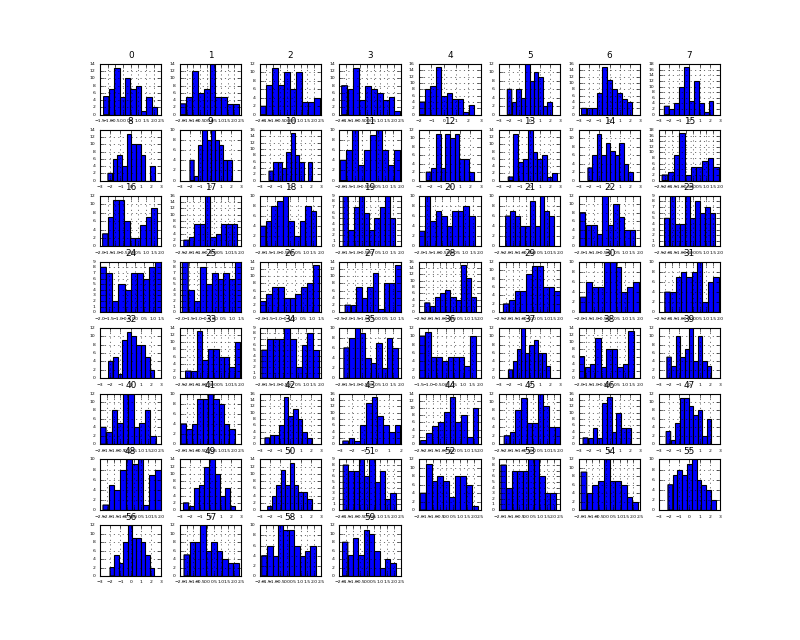

In [83]:
fig = X_test.hist(xlabelsize=4, ylabelsize=4, figsize=(10, 8))
[x.title.set_size(8) for x in fig.ravel()];

<IPython.core.display.Javascript object>


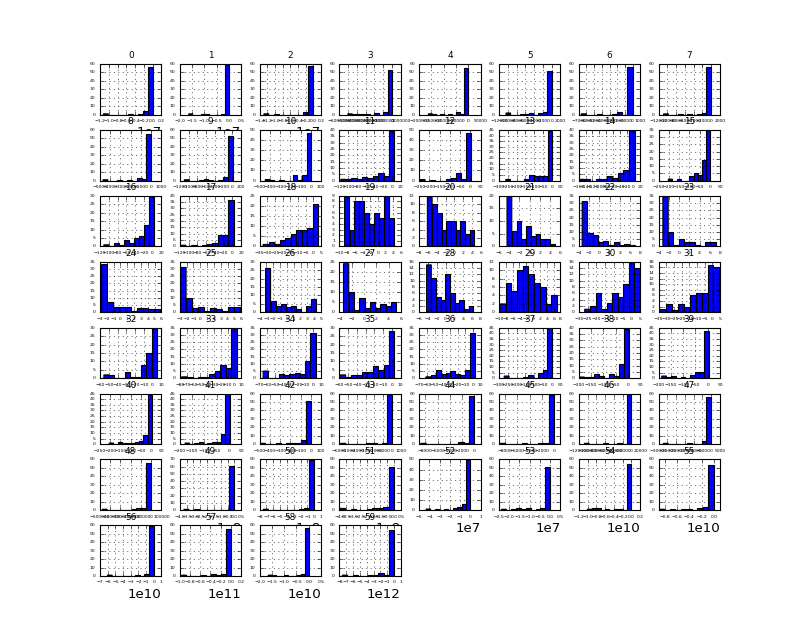

In [79]:
fig = X_test.hist(xlabelsize=4, ylabelsize=4, figsize=(10, 8))
[x.title.set_size(8) for x in fig.ravel()];

In [78]:
y_test.value_counts()

1    35
0    28
Name: M, dtype: int64

In [57]:
data_df.values.shape

(208, 60)

In [58]:
y_train.shape

(145,)